In [1]:
import sys

sys.path.append("..")

import pandas as pd
import numpy as np
from dory.clustering.pca import PCACluster
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import logging

In [2]:
df = pd.read_csv("penguins.csv", header=None)
print(df.describe())

                0           1           2            3           4
count  333.000000  333.000000  333.000000   333.000000  333.000000
mean    43.992793   17.164865  200.966967  4207.057057    0.918919
std      5.468668    1.969235   14.015765   805.215802    0.889718
min     32.100000   13.100000  172.000000  2700.000000    0.000000
25%     39.500000   15.600000  190.000000  3550.000000    0.000000
50%     44.500000   17.300000  197.000000  4050.000000    1.000000
75%     48.600000   18.700000  213.000000  4775.000000    2.000000
max     59.600000   21.500000  231.000000  6300.000000    2.000000


In [3]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

print(f"X.shape {X.shape}, y.shape {y.shape}")

X.shape (333, 4), y.shape (333,)


In [4]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [5]:
pca_2d = PCACluster(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_normalized)

print(f"Explained variance ratio: {pca_2d.explained_variance_ratio_}")
print(f"Total explained variance: {pca_2d.explained_variance_ratio_.sum():.4f}")

Explained variance ratio: [0.68633893 0.19452929]
Total explained variance: 0.8809


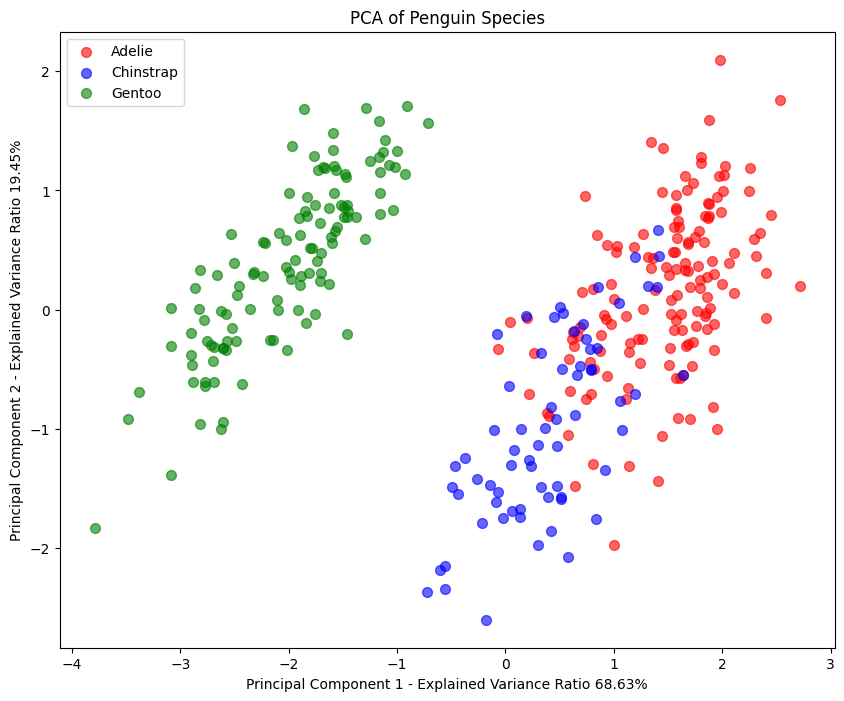

In [6]:
classes = np.unique(y)
colors = ["red", "blue", "green"]
species_names = ["Adelie", "Chinstrap", "Gentoo"]


plt.figure(figsize=(10, 8))

for cls, color, name in zip(classes, colors, species_names):
    mask = y == cls
    plt.scatter(
        X_pca_2d[mask, 0], X_pca_2d[mask, 1], c=color, label=name, alpha=0.6, s=50
    )

plt.legend()
plt.xlabel(
    f"Principal Component 1 - Explained Variance Ratio {pca_2d.explained_variance_ratio_[0]:.2%}"
)
plt.ylabel(
    f"Principal Component 2 - Explained Variance Ratio {pca_2d.explained_variance_ratio_[1]:.2%}"
)
plt.title("PCA of Penguin Species")
plt.show()

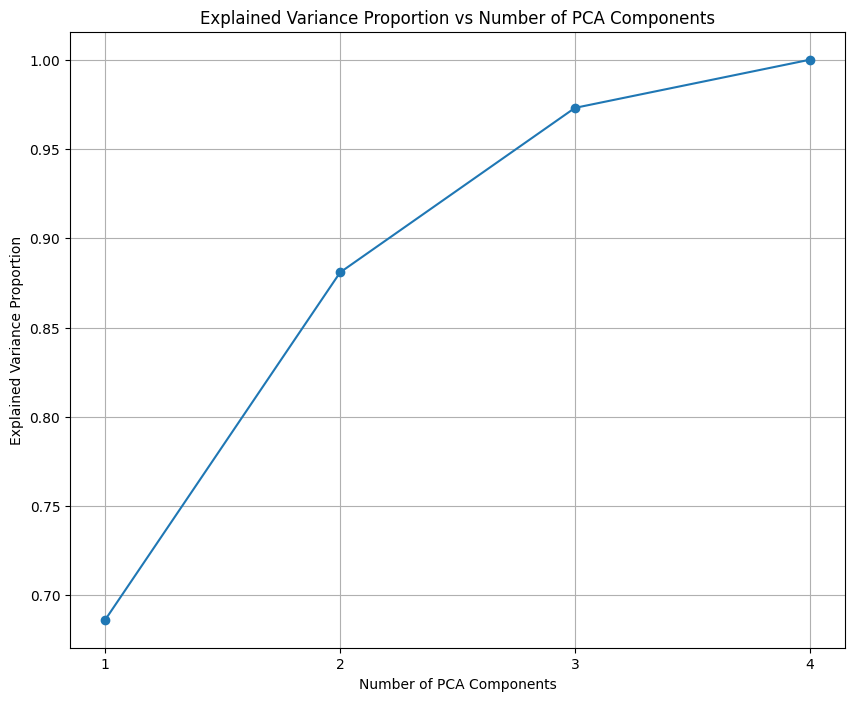

In [7]:
plt.figure(figsize=(10, 8))

explained_variance_proportion = []

for n_components in range(1, 4 + 1):
    pca = PCACluster(n_components=n_components)
    pca.fit(X_normalized)
    total_variance = pca.explained_variance_ratio_.sum()
    explained_variance_proportion.append(total_variance)

plt.plot(range(1, 4 + 1), explained_variance_proportion, marker="o")
plt.title("Explained Variance Proportion vs Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Explained Variance Proportion")
plt.xticks(range(1, 4 + 1))
plt.grid()
plt.show()